# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████| 8.72M/8.72M [00:00<00:00, 55.4MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_rows=[]

# Loop through the scraped data to create a list of rows
rows = table.find_all('tr',class_='data-row')

for row in rows:
    row_data = row.find_all('td')
    full_row = [data_point.text for data_point in row_data]
    mars_rows.append(full_row)

In [7]:
# Print row list
mars_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [ ]:
browser.quit()

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_rows, columns=['id', 'terrestrial_date', 'sol','ls','month','min_temp','pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
import datetime

In [13]:
# Change data types for data analysis
mars_df["sol"] = mars_df["sol"].astype(int)
mars_df["ls"] = mars_df["ls"].astype(int)
mars_df["month"] = mars_df["month"].astype(int)
mars_df["min_temp"] = mars_df["min_temp"].astype(float)
mars_df["pressure"] = mars_df["pressure"].astype(float)
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
# There are 12 months on Mars.
mars_df['month'].unique().size

12

In [28]:
# 2. How many Martian days' worth of data are there?
# There are 1867 data points representing 1867 days of data.

mars_df['sol'].describe()

count    1867.000000
mean     1015.670059
std       565.342298
min        10.000000
25%       546.500000
50%      1028.000000
75%      1505.500000
max      1977.000000
Name: sol, dtype: float64

In [17]:
# To confirm, sol is the number of elapsed sols (Martian days) since Curiosity landed on Mars.

mars_df['sol'].unique().size

1867

In [26]:
# 3. What is the average low temperature by month?
# The average lows for all 12 months are displayed below.
mars_by_month = mars_df.groupby("month").mean()
mars_by_month["min_temp"]

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

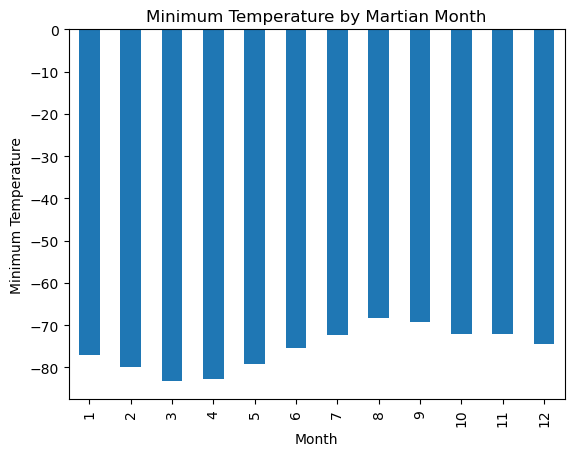

In [72]:
# Plot the average temperature by month
import matplotlib.pyplot as plt
mars_by_month['min_temp'].plot(kind='bar',ylabel='Minimum Temperature',xlabel="Month",title="Minimum Temperature by Martian Month")
plt.savefig("Minimum_Temperature_by_Martian_Month.png")

In [ ]:
# Identify the coldest and hottest months in Curiosity's location
#From this plot and the previous data frame displaying average temperatures, the third month is the coldest, with an average temperature of -83.3, and the 8th month is the warmest, with an average temperature of -68.38.

In [25]:
# 4. Average pressure by Martian month
# The average pressue for all 12 months are displayed below.
mars_by_month["pressure"]

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

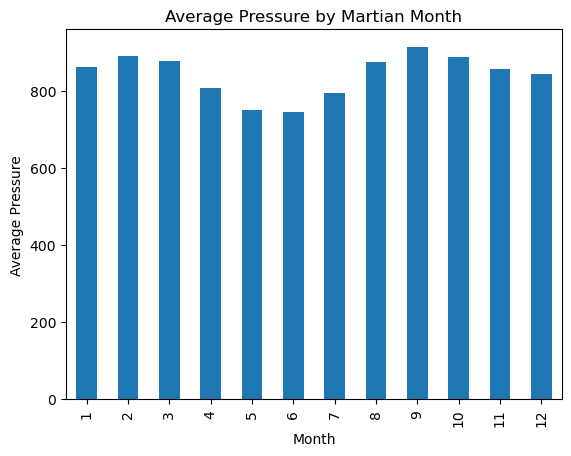

In [71]:
# Plot the average pressure by month
mars_by_month['pressure'].plot(kind='bar',ylabel='Average Pressure',xlabel="Month",title="Average Pressure by Martian Month")
plt.savefig("Average_Pressure_by_Martian_Month.png")

In [57]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df_dates = mars_df.loc[:,['terrestrial_date','min_temp']]
mars_df_dates

,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


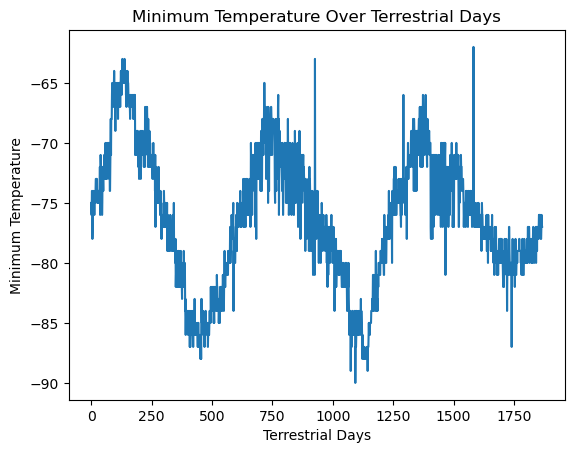

In [73]:
mars_df_dates['min_temp'].plot(ylabel='Minimum Temperature',xlabel="Terrestrial Days",title="Minimum Temperature Over Terrestrial Days")
plt.savefig("Minimum_Temperature_Over_Terrestrial_Days.png")

In [ ]:
## On this graph, the first terrestrial day recorded is set at a value of zero, with each increment of 1 representing another day of the earth's calendar.
## We know that the temperature on mars follows a cyclical pattern throughout the year, so the length of time between the visual dips of the lowest temperature should represent one martian year.
### I would estimate that the first bottom dip occurs around day 450 and the second around day 1125, so if we subtract that we'd get 675 earth days that have elapsed for the martian year.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [65]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index_label="Row_ID")
mars_by_month.to_csv('mars_averages_by_month.csv',index_label="Row_ID")
mars_df_dates.to_csv('mars_earth_year_comparison.csv',index_label="Row_ID")

In [66]:
browser.quit()